## Sentiment Analysis (Amazon Reviews)

In this project we will be doing some sentiment analysis in python using the following technique:

1 - VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

C:\Users\35383\AppData\Local\Temp\ipykernel_18536\2032467026.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
#reading data
df = pd.read_csv('Reviews.csv')

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [8]:
df.shape

(568454, 10)

In [9]:
df = df.head(1000)

In [10]:
df.shape

(1000, 10)

### Quick EDA

In [11]:
df['Score'].value_counts().sort_index()

Score
1     98
2     47
3     75
4    138
5    642
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

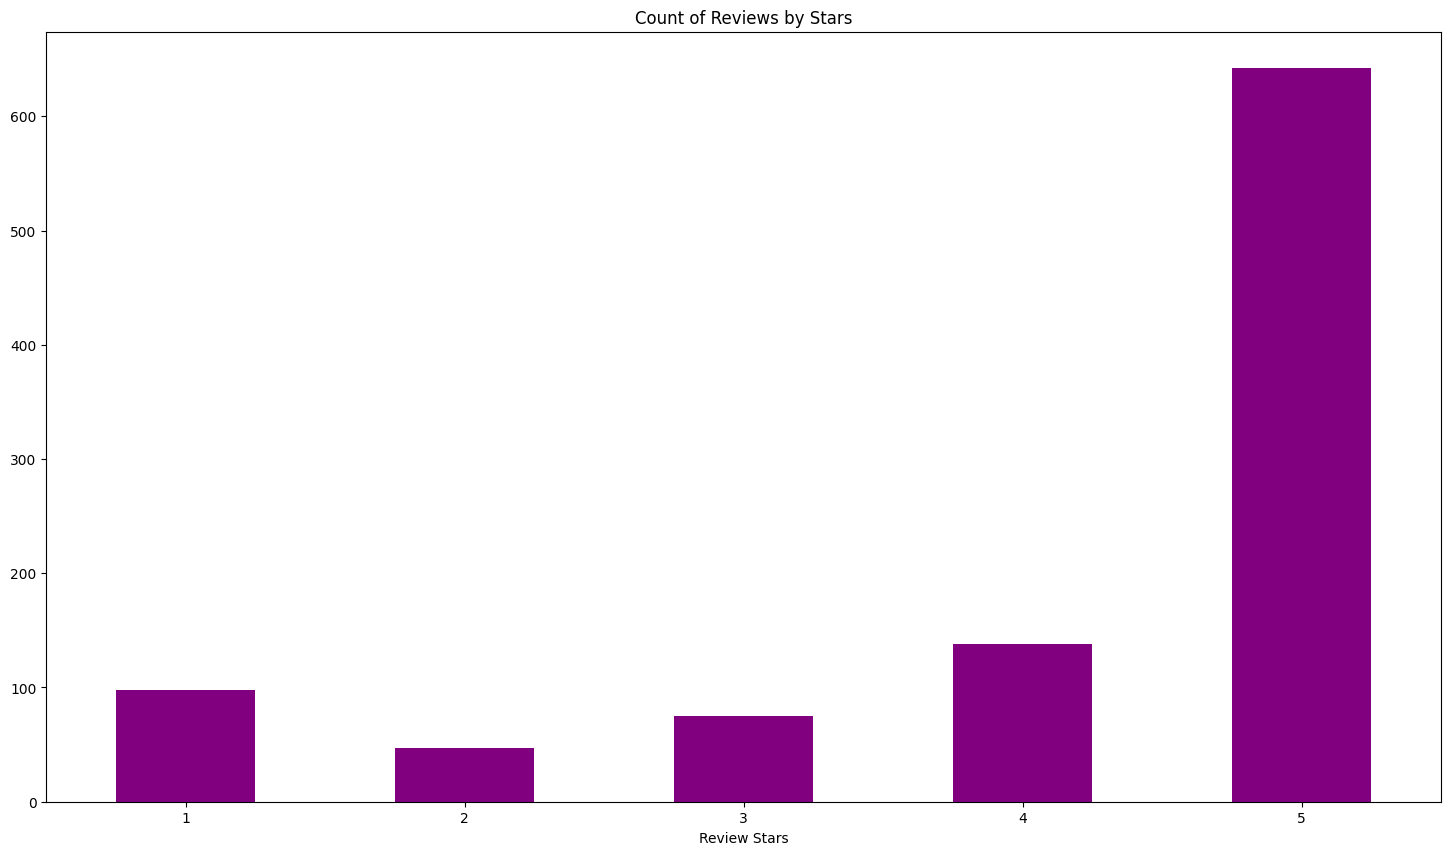

In [12]:
plot = df['Score'].value_counts().sort_index() \
.plot(kind = 'bar', 
color = 'purple',
title = 'Count of Reviews by Stars',
xlabel= ('Review Stars'),
figsize = (18,10))
plt.xticks(rotation=0)
#plot.set_xlabel('Review Stars')
plt.show  

We can see from the graph that most of the reviews from our data have 5 stars.

### Basic NLTK

In [13]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [14]:
#Let's tokenize some of the reviews
import nltk
nltk.download('vader_lexicon')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\35383\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [15]:
 #NLTK Part of Speech (POS) tags
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [16]:
import nltk

entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER sentiment Analysis

We will use NLTK's SentimentIntensityAnalyzer to get the negative/neutral/positive scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
#tqdm helps us see the progress of the loop
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [19]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [20]:
from tqdm.notebook import tqdm_notebook as tqdm

res = {}
for i, row in tqdm(df.iterrows(), total=len(df), desc="Processing Rows"):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

Processing Rows:   0%|          | 0/1000 [00:00<?, ?it/s]

In [21]:
pd.DataFrame(res)

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
neg,0.0000,0.1380,0.0910,0.0,0.0000,0.029,0.0340,0.0000,0.0000,0.0000,...,0.032,0.0000,0.0000,0.0000,0.0000,0.0260,0.0000,0.0000,0.0630,0.0270
neu,0.6950,0.8620,0.7540,1.0,0.5520,0.809,0.6930,0.5200,0.8510,0.7050,...,0.667,0.6330,0.6620,0.8860,0.8280,0.7210,0.7860,0.6730,0.8740,0.9390
pos,0.3050,0.0000,0.1550,0.0,0.4480,0.163,0.2730,0.4800,0.1490,0.2950,...,0.301,0.3670,0.3380,0.1140,0.1720,0.2530,0.2140,0.3270,0.0620,0.0340
compound,0.9441,-0.5664,0.8265,0.0,0.9468,0.883,0.9346,0.9487,0.6369,0.8313,...,0.973,0.9749,0.9636,0.8858,0.7552,0.9788,0.9309,0.9634,-0.0129,-0.1027


In [22]:
#Shortcut to flip the dataframe
#In Pandas, the T attribute stands for transpose, which switches the rows and columns of the DataFrame
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
996,0.026,0.721,0.253,0.9788
997,0.000,0.786,0.214,0.9309
998,0.000,0.673,0.327,0.9634
999,0.063,0.874,0.062,-0.0129


In [23]:
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')

In [24]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


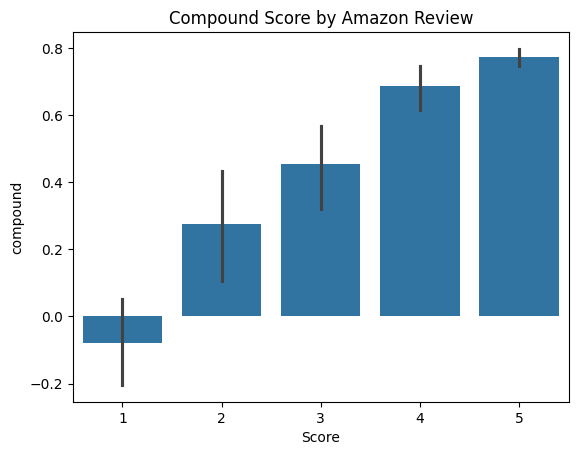

In [25]:
#plot vader results
plot = sns.barplot(data=vaders, x = 'Score', y = 'compound')
plot.set_title('Compound Score by Amazon Review')
plt.show()

The compound score provided by VADER ranges from -1 to 1 and represents the overall sentiment polarity of a text, where:

Scores closer to 1 indicate highly positive sentiment.

Scores closer to -1 indicate highly negative sentiment.

Scores around 0 indicate neutral sentiment.

Based on the provided compound score ranges for each star rating:

For 1-star reviews: Compound scores range from -0.2 to 0.1. This suggests that the sentiment expressed in 1-star reviews is predominantly negative, but not extremely negative.

For 2-star reviews: Compound scores range from 0.1 to 0.4. This suggests that the sentiment expressed in 2-star reviews is somewhat positive, but still relatively neutral overall.

For 3-star reviews: Compound scores range from 0.3 to 0.58. This indicates that the sentiment expressed in 3-star reviews is moderately positive.

For 4-star reviews: Compound scores range from 0.6 to 0.75. This suggests that the sentiment expressed in 4-star reviews is quite positive.

For 5-star reviews: Compound scores are around 0.8. This indicates that the sentiment expressed in 5-star reviews is highly positive.


In summary, the provided compound score ranges give an overview of the sentiment expressed in reviews for each star rating category. It allows you to understand the general sentiment polarity associated with different levels of ratings, from highly negative for 1-star to highly positive for 5-star reviews, with varying degrees of positivity or negativity in between.

Text(0.5, 1.0, 'Positive Sentiment Score for Review stars')

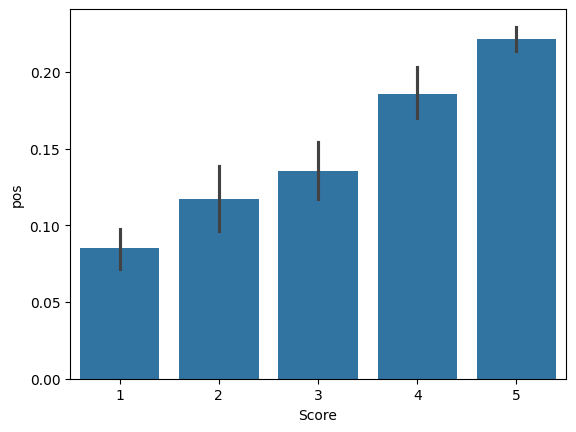

In [38]:
#plot the positive score and reviews
sns.barplot(data=vaders, x = 'Score', y = 'pos')
plot.set_title('Positive Sentiment Score for Review stars')

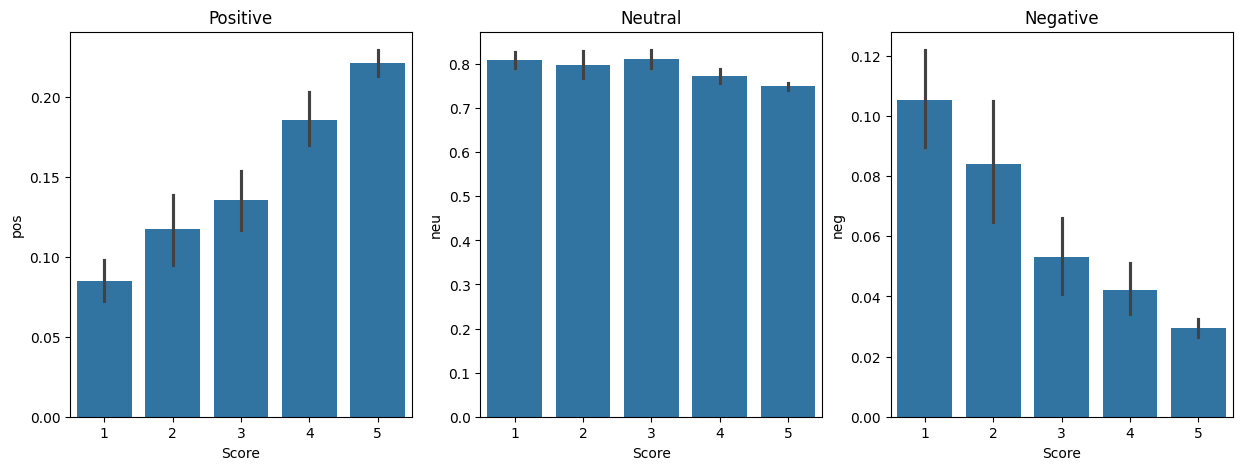

In [27]:
#subplots using sns
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x = 'Score', y = 'pos', ax=axs[0])
sns.barplot(data=vaders, x = 'Score', y = 'neu', ax=axs[1])
sns.barplot(data=vaders, x = 'Score', y = 'neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

The above subplots show how the average sentiment scores (positive, neutral and negative) vary across the different review scores. 